In [6]:
import  pandas as pd 
%matplotlib inline

In [2]:
df = pd.read_csv('../data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df['total_bill'].max()

50.81

## Визуализация с помощью Pandas

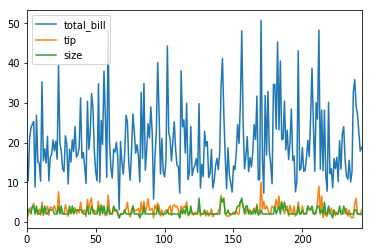

In [7]:
df.plot()

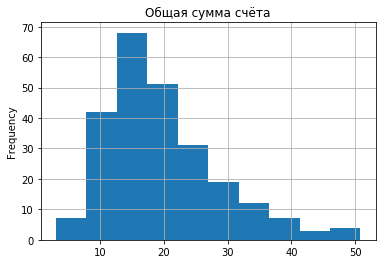

In [9]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

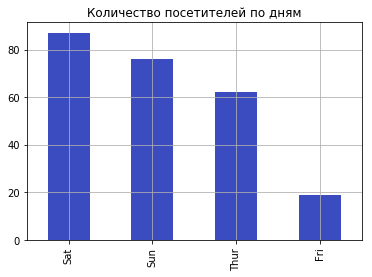

In [12]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

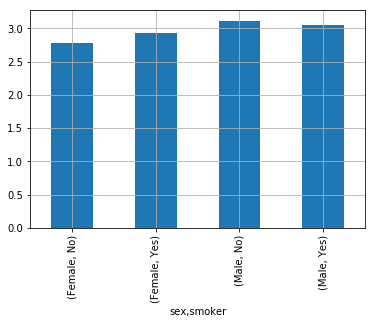

In [15]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

In [18]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean()

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

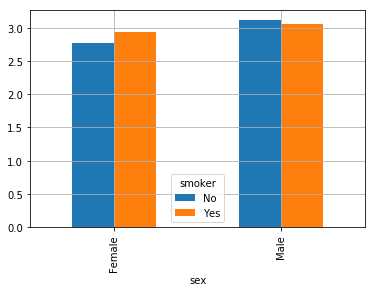

In [17]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'tip').plot(kind = 'bar', grid= True)

In [19]:
df.pivot_table(index = 'sex', columns = 'smoker', values = 'tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [25]:
df[df['tip'] > 5]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f97d4089940>,
      dtype=object)

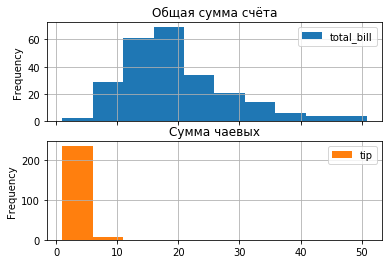

In [23]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = True)

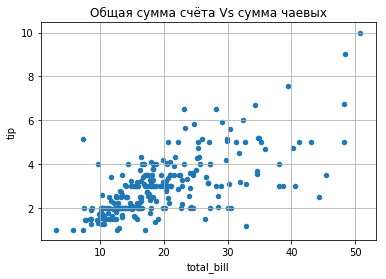

In [26]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

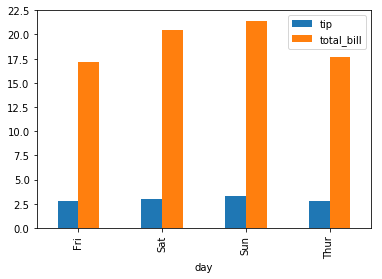

In [27]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

In [28]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean')

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


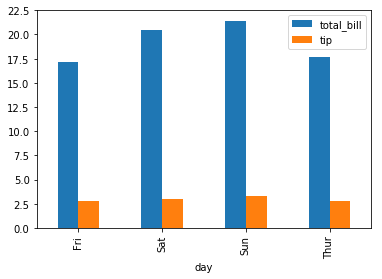

In [36]:
df[['day', 'total_bill', 'tip']].groupby(['day']).mean().plot(kind='bar')

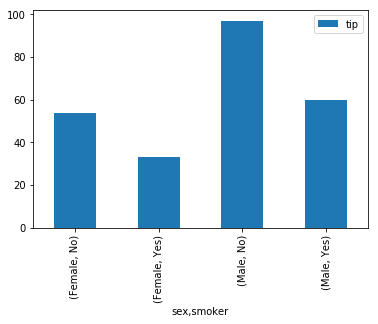

In [37]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

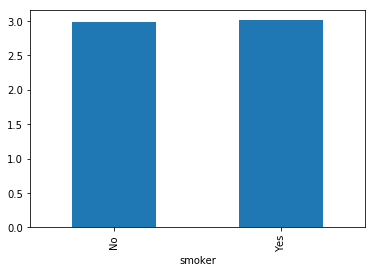

In [38]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

## Визуализация с помощью MatPlotLib

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/tips.csv')

Text(0.5, 0, 'Сумма заказа, USD')

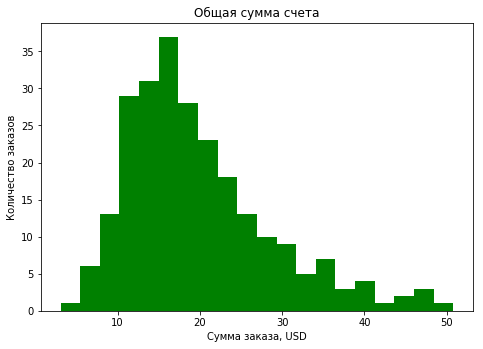

In [42]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

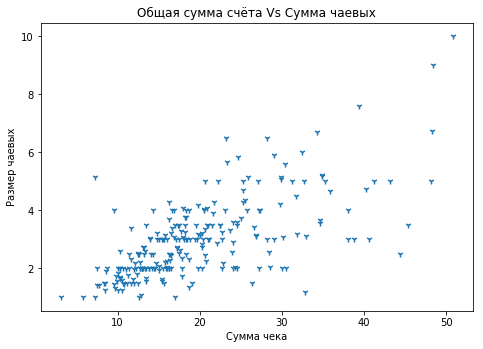

In [44]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '1')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

In [53]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

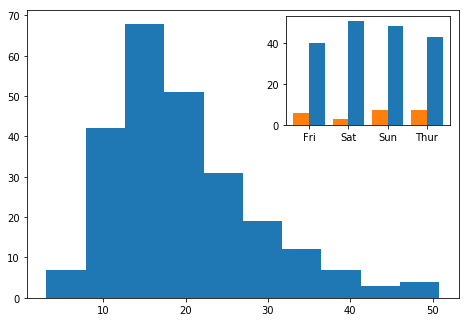

In [55]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

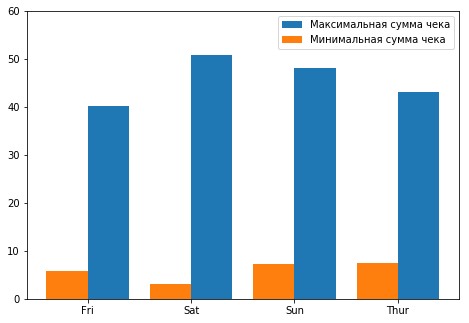

In [60]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 0)

Text(0.5, 1.0, 'Сумма счета vs Сумма чаевых')

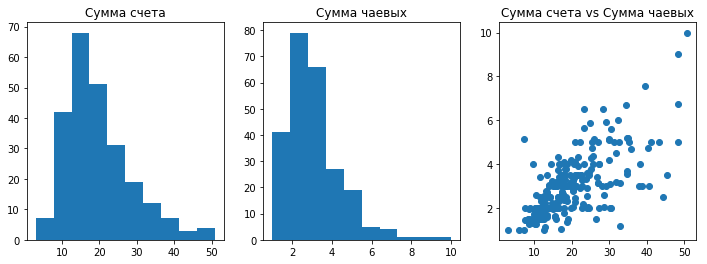

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(df['total_bill'])
axes[0].set_title('Сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df['total_bill'], y=df['tip'], marker='o')
axes[2].set_title('Сумма счета vs Сумма чаевых')

In [77]:
import numpy as np 

In [80]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

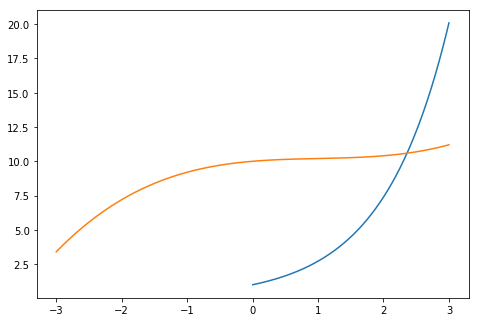

In [84]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

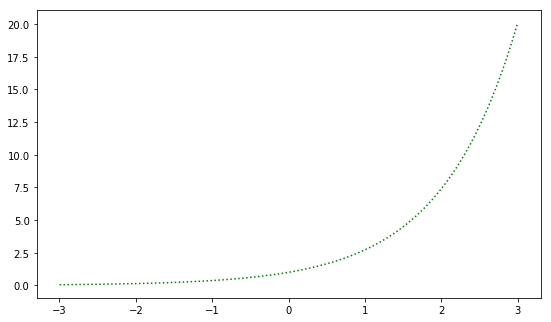

In [94]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle=':', color='g')

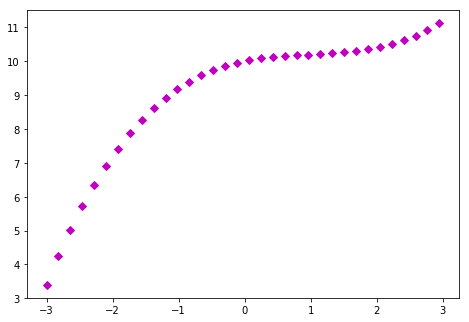

In [90]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

## Визуализация с помощью SeaBorn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('../data/tips.csv')

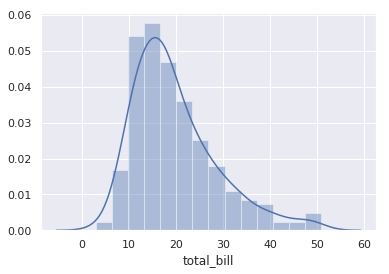

In [6]:
sns.set()
sns.distplot(df['total_bill'])

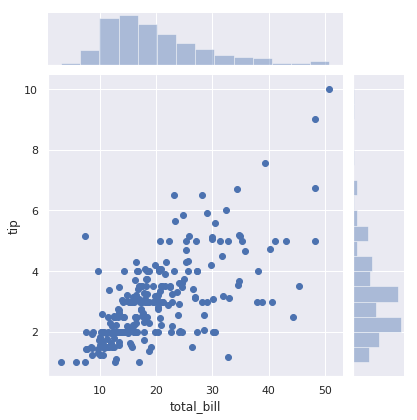

In [22]:
sns.jointplot(x='total_bill', y='tip', data=df)

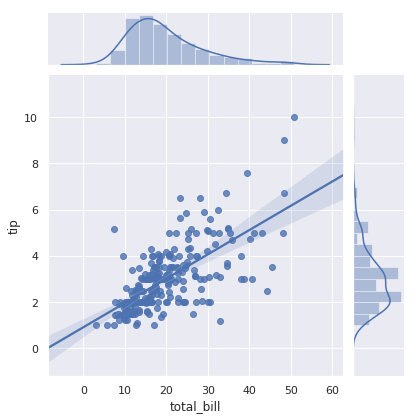

In [23]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

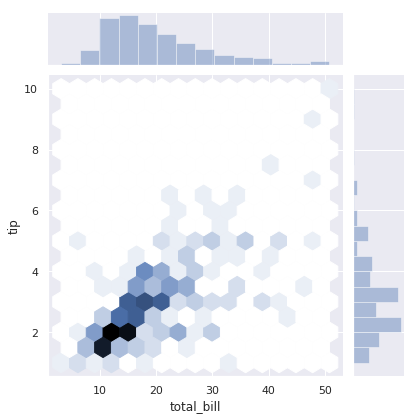

In [24]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')

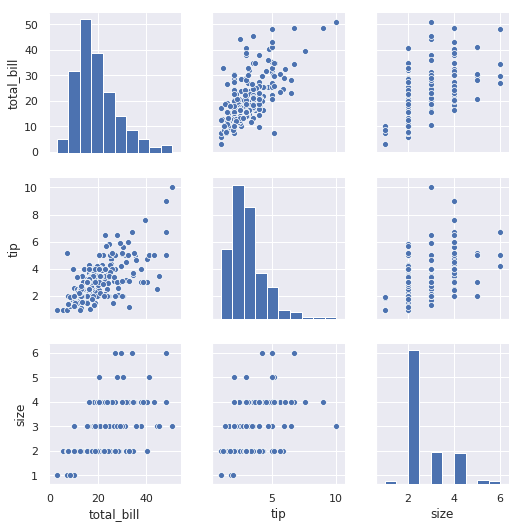

In [26]:
sns.pairplot(df)

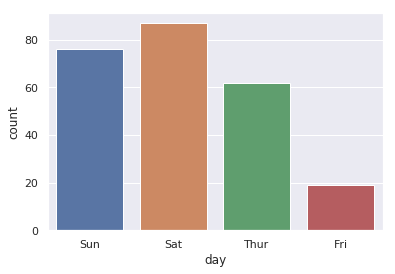

In [27]:
sns.countplot(x='day', data=df)

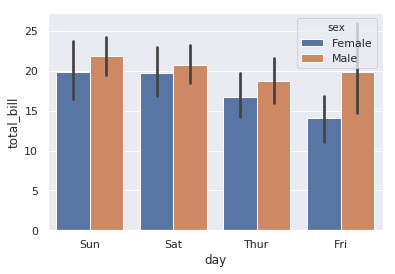

In [30]:
sns.barplot(x='day', y='total_bill', data=df, hue='sex')

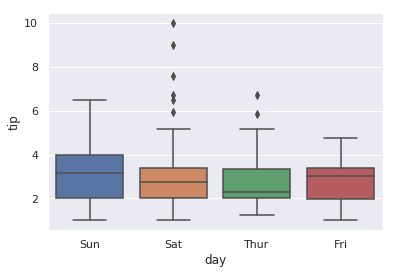

In [32]:
sns.boxplot(x='day', y='tip', data=df)

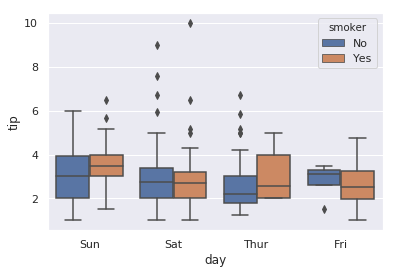

In [33]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

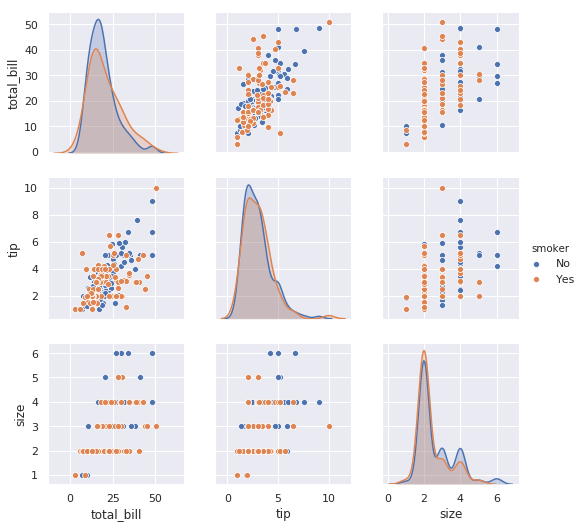

In [34]:
sns.pairplot(df, hue='smoker')

In [37]:
correlation = df.corr()
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


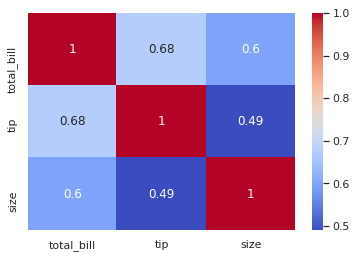

In [42]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

## Визуализация с помощью Plotly

In [4]:
import plotly

In [1]:
!pip install --user cufflinks

Processing /notebooks/home/.cache/pip/wheels/7d/ba/8d/38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5/cufflinks-0.17.3-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/f3/93bc71d449828098efc7dda0a682937762d0c17f6140dcbc6fc6fa2a467d/plotly-4.13.0-py2.py3-none-any.whl


In [1]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:

In [3]:
init_notebook_mode(connected = True)
cf.go_offline()

In [6]:
df = pd.read_csv('../data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


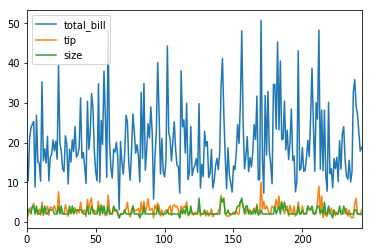

In [7]:
df.plot()

In [8]:
df.iplot()

In [9]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [10]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')